In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
#store distances to nearest neighbours
# obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
# qs::qsave(obob_milo, 'obob_milo_neuron.qs')
obob_milo = qs::qread('obob_milo_neuron.qs')

In [4]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch')]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group        batch   
M9  M9          FGF1.Day5    Batch__1
J2  J2          Veh_PF.Day14 Batch__1
N7  N7          FGF1.Day5    Batch__1
M8  M8          Veh_PF.Day5  Batch__1
N8  N8          Veh_PF.Day5  Batch__1
M13 M13         FGF1.Day14   Batch__1

In [5]:
contrast.all = c("groupVeh_PF.Day14-groupVeh_PF.Day5")
model <- model.matrix(~0 + group, data=obob_design)
mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupFGF1.Day14 groupVeh_PF.Day14 groupFGF1.Day5 groupVeh_PF.Day5
M9  0               0                 1              0               
J2  0               1                 0              0               
N7  0               0                 1              0               
M8  0               0                 0              1               
N8  0               0                 0              1               
M13 1               0                 0              0

In [6]:
options(width=120) 
print(model)

    groupFGF1.Day14 groupVeh_PF.Day14 groupFGF1.Day5 groupVeh_PF.Day5
M9                0                 0              1                0
J2                0                 1              0                0
N7                0                 0              1                0
M8                0                 0              0                1
N8                0                 0              0                1
M13               1                 0              0                0
M24               0                 1              0                0
J11               1                 0              0                0
J16               1                 0              0                0
M11               0                 0              0                1
M23               1                 0              0                0
N17               0                 0              1                0
M25               0                 1              0                0
M27               1 

In [7]:
print(mod.contrast)

                   Contrasts
Levels              groupVeh_PF.Day14-groupVeh_PF.Day5
  groupFGF1.Day14                                    0
  groupVeh_PF.Day14                                  1
  groupFGF1.Day5                                     0
  groupVeh_PF.Day5                                  -1


In [30]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, model.contrasts = c("groupFGF1.Day5-groupVeh_PF.Day5"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



logFC     logCPM   F        PValue       FDR          Nhood SpatialFDR  
2123  6.324723 7.923779 54.39264 9.049160e-10 5.522703e-06 2123  7.176911e-06
5673  6.025380 7.805042 44.74494 1.205856e-08 3.679669e-05 5673  5.214957e-05
4168  4.083695 7.938276 31.24776 5.613858e-07 1.142046e-03 4168  1.616667e-03
3058  4.145917 7.723501 30.10084 8.318644e-07 1.269217e-03 3058  1.878557e-03
5264 -3.427141 8.090665 28.95162 1.240333e-06 1.513951e-03 5264  1.971517e-03
4044  3.070317 7.988379 24.82681 5.455287e-06 4.756231e-03 4044  6.224051e-03


FALSE  TRUE 
 5939   164 

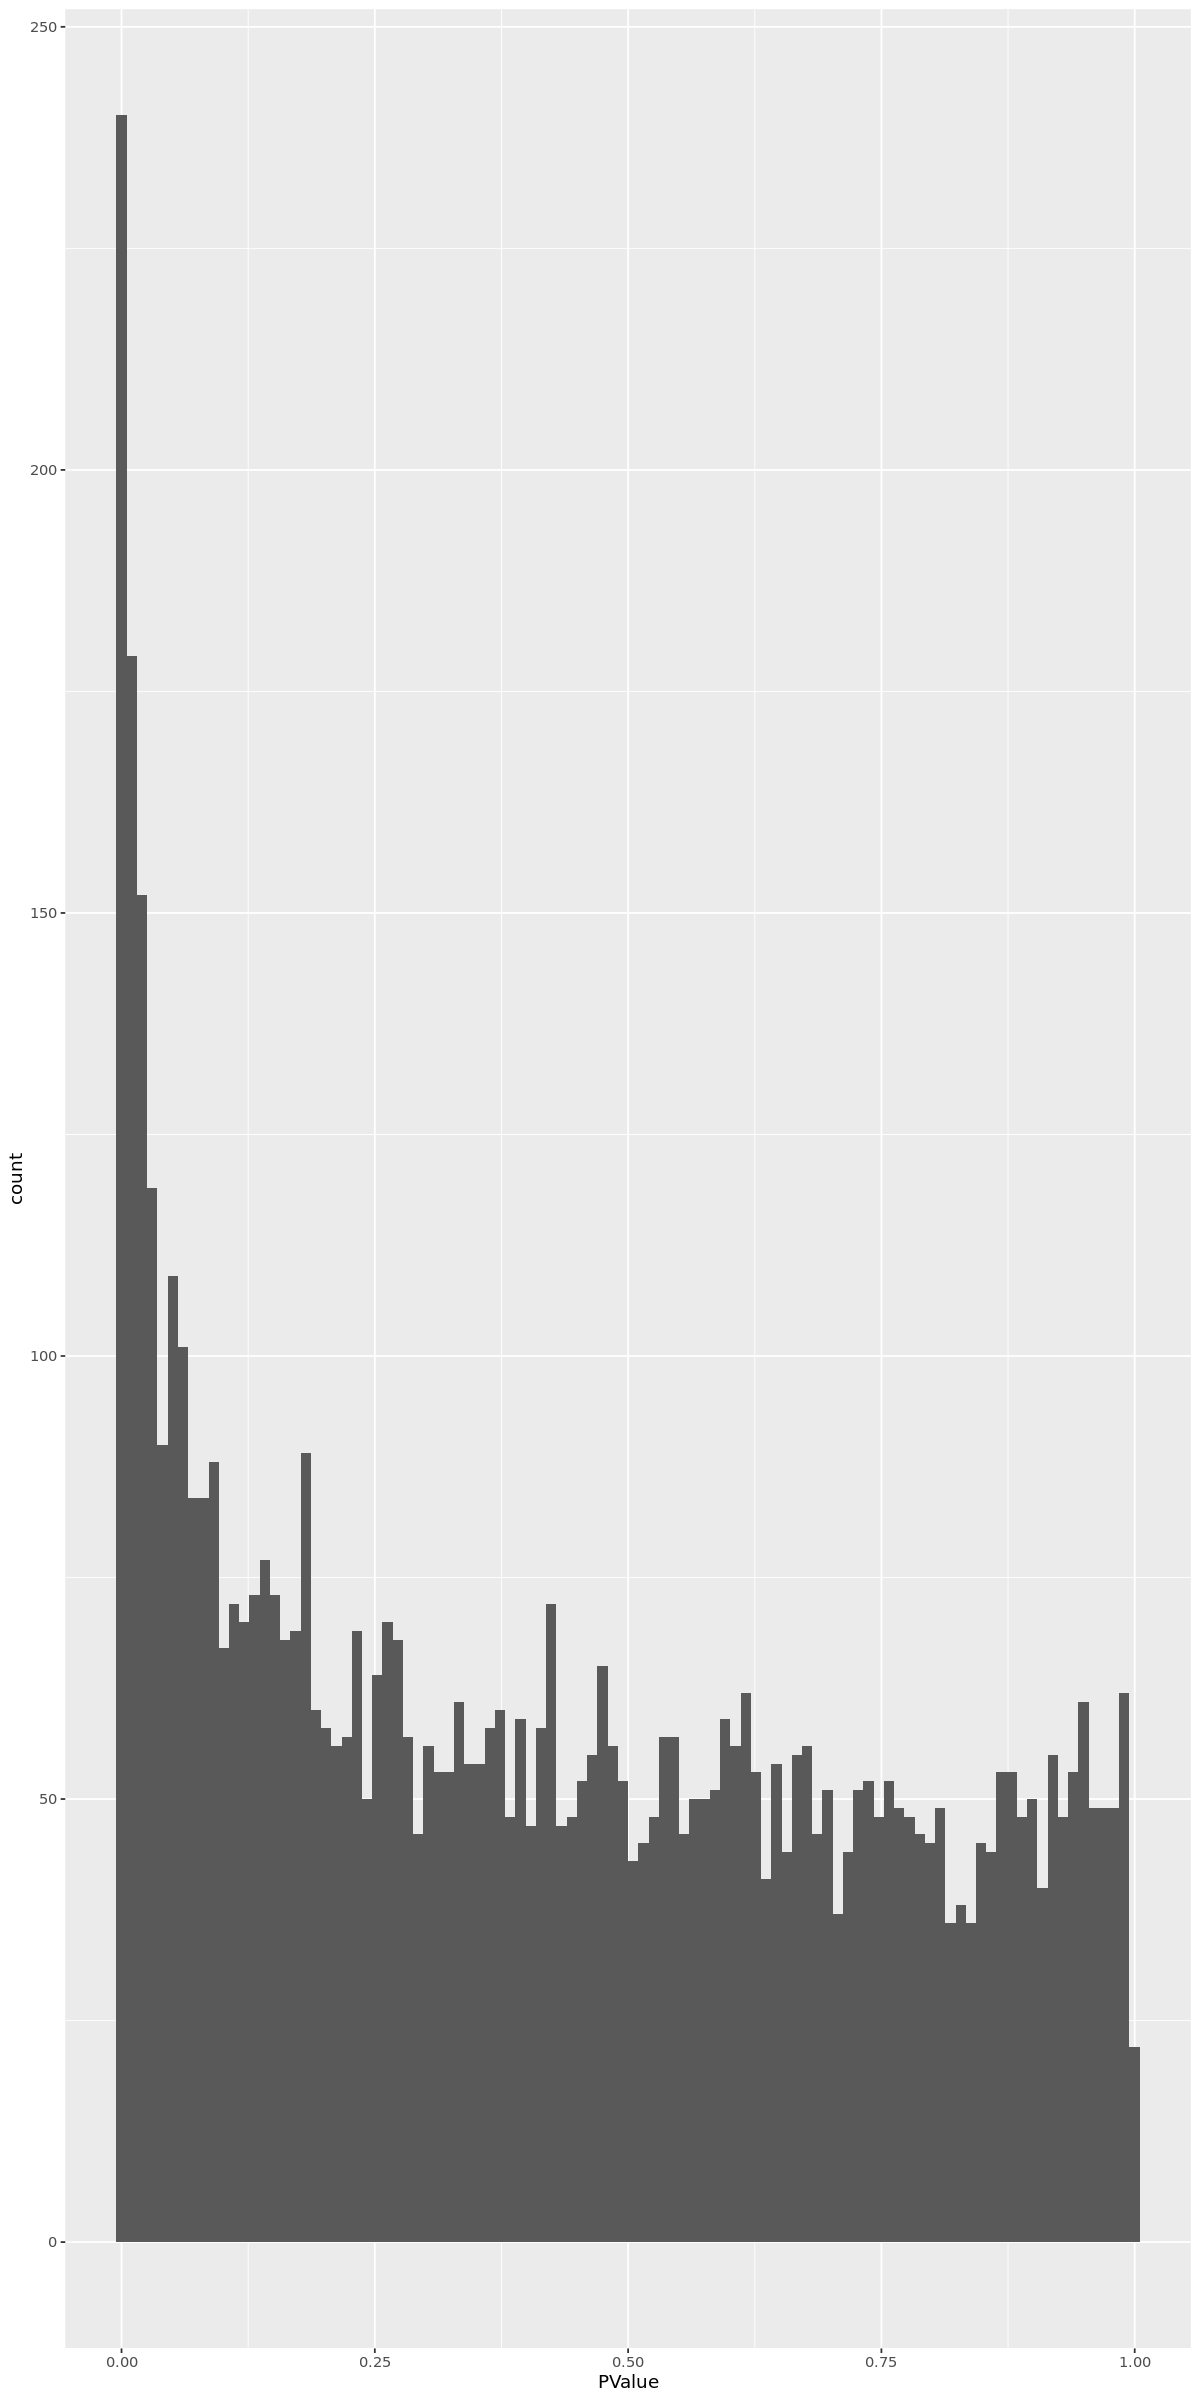

In [31]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

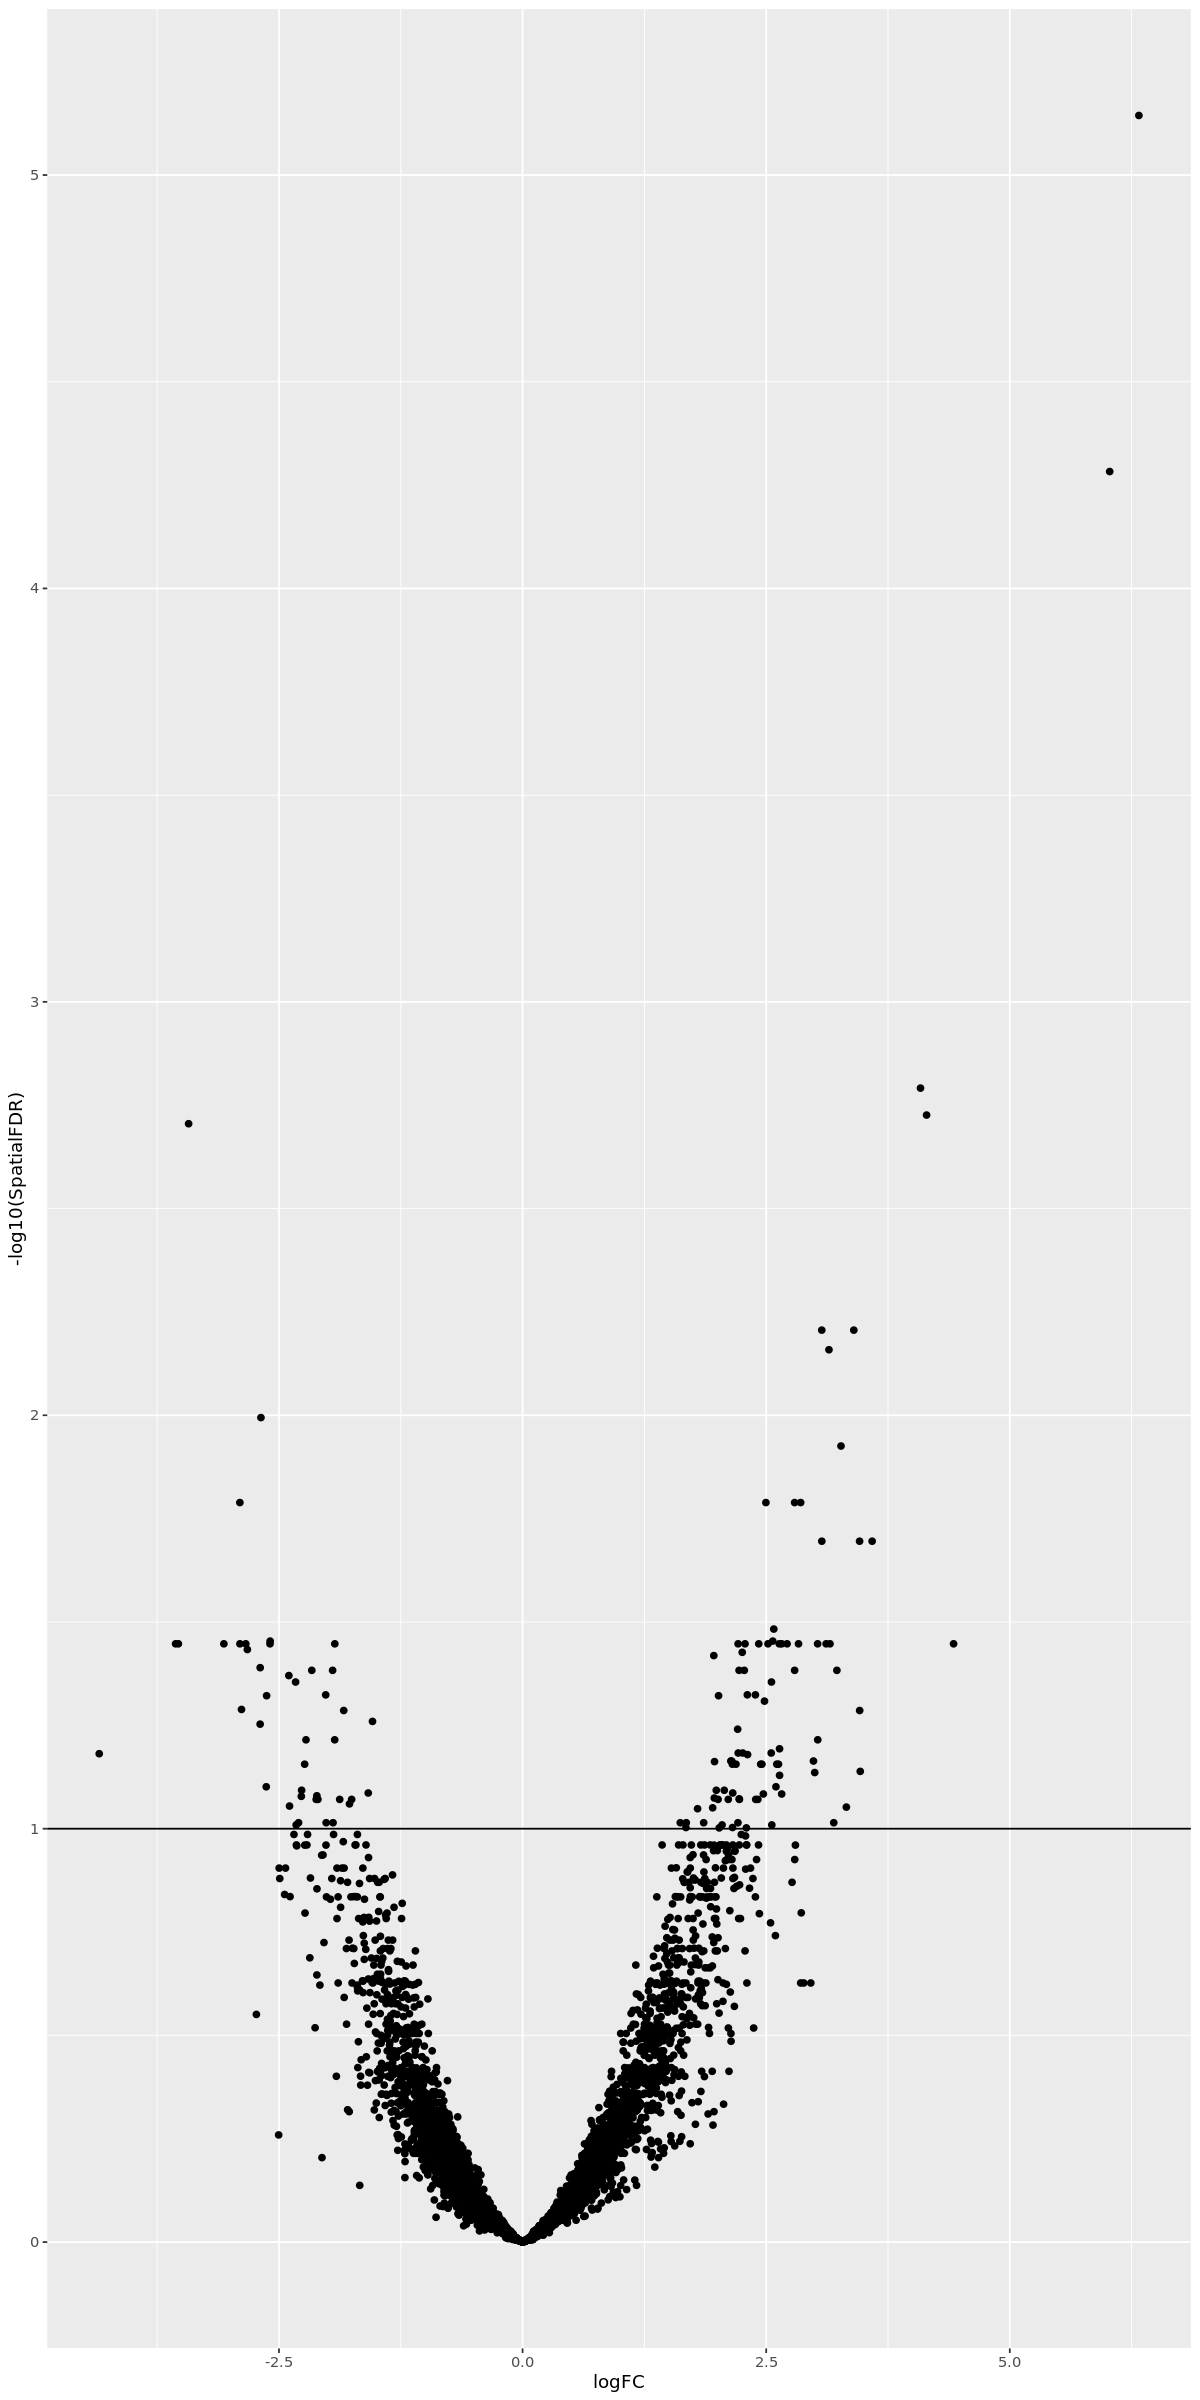

In [32]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [33]:
obob_milo <- buildNhoodGraph(obob_milo)

In [34]:
head(data.frame(colData(obob_milo)))

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO Index.HTO nCount_spliced
GCAGCCACACAGCCAC_1_1 SI-TT-A11  69641      7356         SI-TT-A11 1532       12           D706       9837         
TGCTTGCAGTTCCGTA_1_1 SI-TT-A11  71825      7455         SI-TT-A11 1616       12           D706       8834         
GAGGCAAGTACCTAAC_1_1 SI-TT-A11  68817      7344         SI-TT-A11 1884       12           D706       8246         
GTAATGCTCTGTCCCA_1_1 SI-TT-A11  69910      7425         SI-TT-A11 2555       12           D706      10497         
GATCACACACCCAAGC_1_1 SI-TT-A11  62110      6862         SI-TT-A11 1728       12           D706       9451         
GGACGTCCAGGCCCTA_1_1 SI-TT-A11  63372      7265         SI-TT-A11 1778       12           D706       8563         
                     nFeature_spliced nCount_unspliced ⋯ collection_date isolation_date batch    predicted.id
GCAGCCACACAGCCAC_1_1 3757             59804            ⋯ 220329          22/6/2022      Batch__1 Nr5a1_Bdnf  
TGCTTGCAGTTCCGTA_1_1 3443             62991            ⋯ 220201          22/6/2022      Batch__1 Unassigned1 
GAGGCAAGTACCTAAC_1_1 3326             60571            ⋯ 220201          22/6/2022      Batch__1 Unassigned1 
GTAATGCTCTGTCCCA_1_1 3727             59413            ⋯ 211213          22/6/2022      Batch__1 Hdc         
GATCACACACCCAAGC_1_1 3566             52659            ⋯ 220329          22/6/2022      Batch__1 Unassigned1 
GGACGTCCAGGCCCTA_1_1 3478             54809            ⋯ 211214          22/6/2022      Batch__1 Nr5a1_Bdnf  
                     prediction.score.max labels          nCount_integrated nFeature_integrated group        ident
GCAGCCACACAGCCAC_1_1 1.0000000            Nr5a1_Bdnf      0                 0                   FGF1.Day5    0    
TGCTTGCAGTTCCGTA_1_1 0.8065577            Unassigned1     0                 0                   Veh_PF.Day14 17   
GAGGCAAGTACCTAAC_1_1 0.8525726            Unassigned1     0                 0                   Veh_PF.Day14 28   
GTAATGCTCTGTCCCA_1_1 1.0000000            Gm8773_Tac1-Hdc 0                 0                   FGF1.Day5    27   
GATCACACACCCAAGC_1_1 0.6368759            Unassigned1     0                 0                   Veh_PF.Day5  37   
GGACGTCCAGGCCCTA_1_1 1.0000000            Nr5a1_Bdnf      0                 0                   Veh_PF.Day5  0

In [35]:
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="predicted.id", text_by = "predicted.id", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

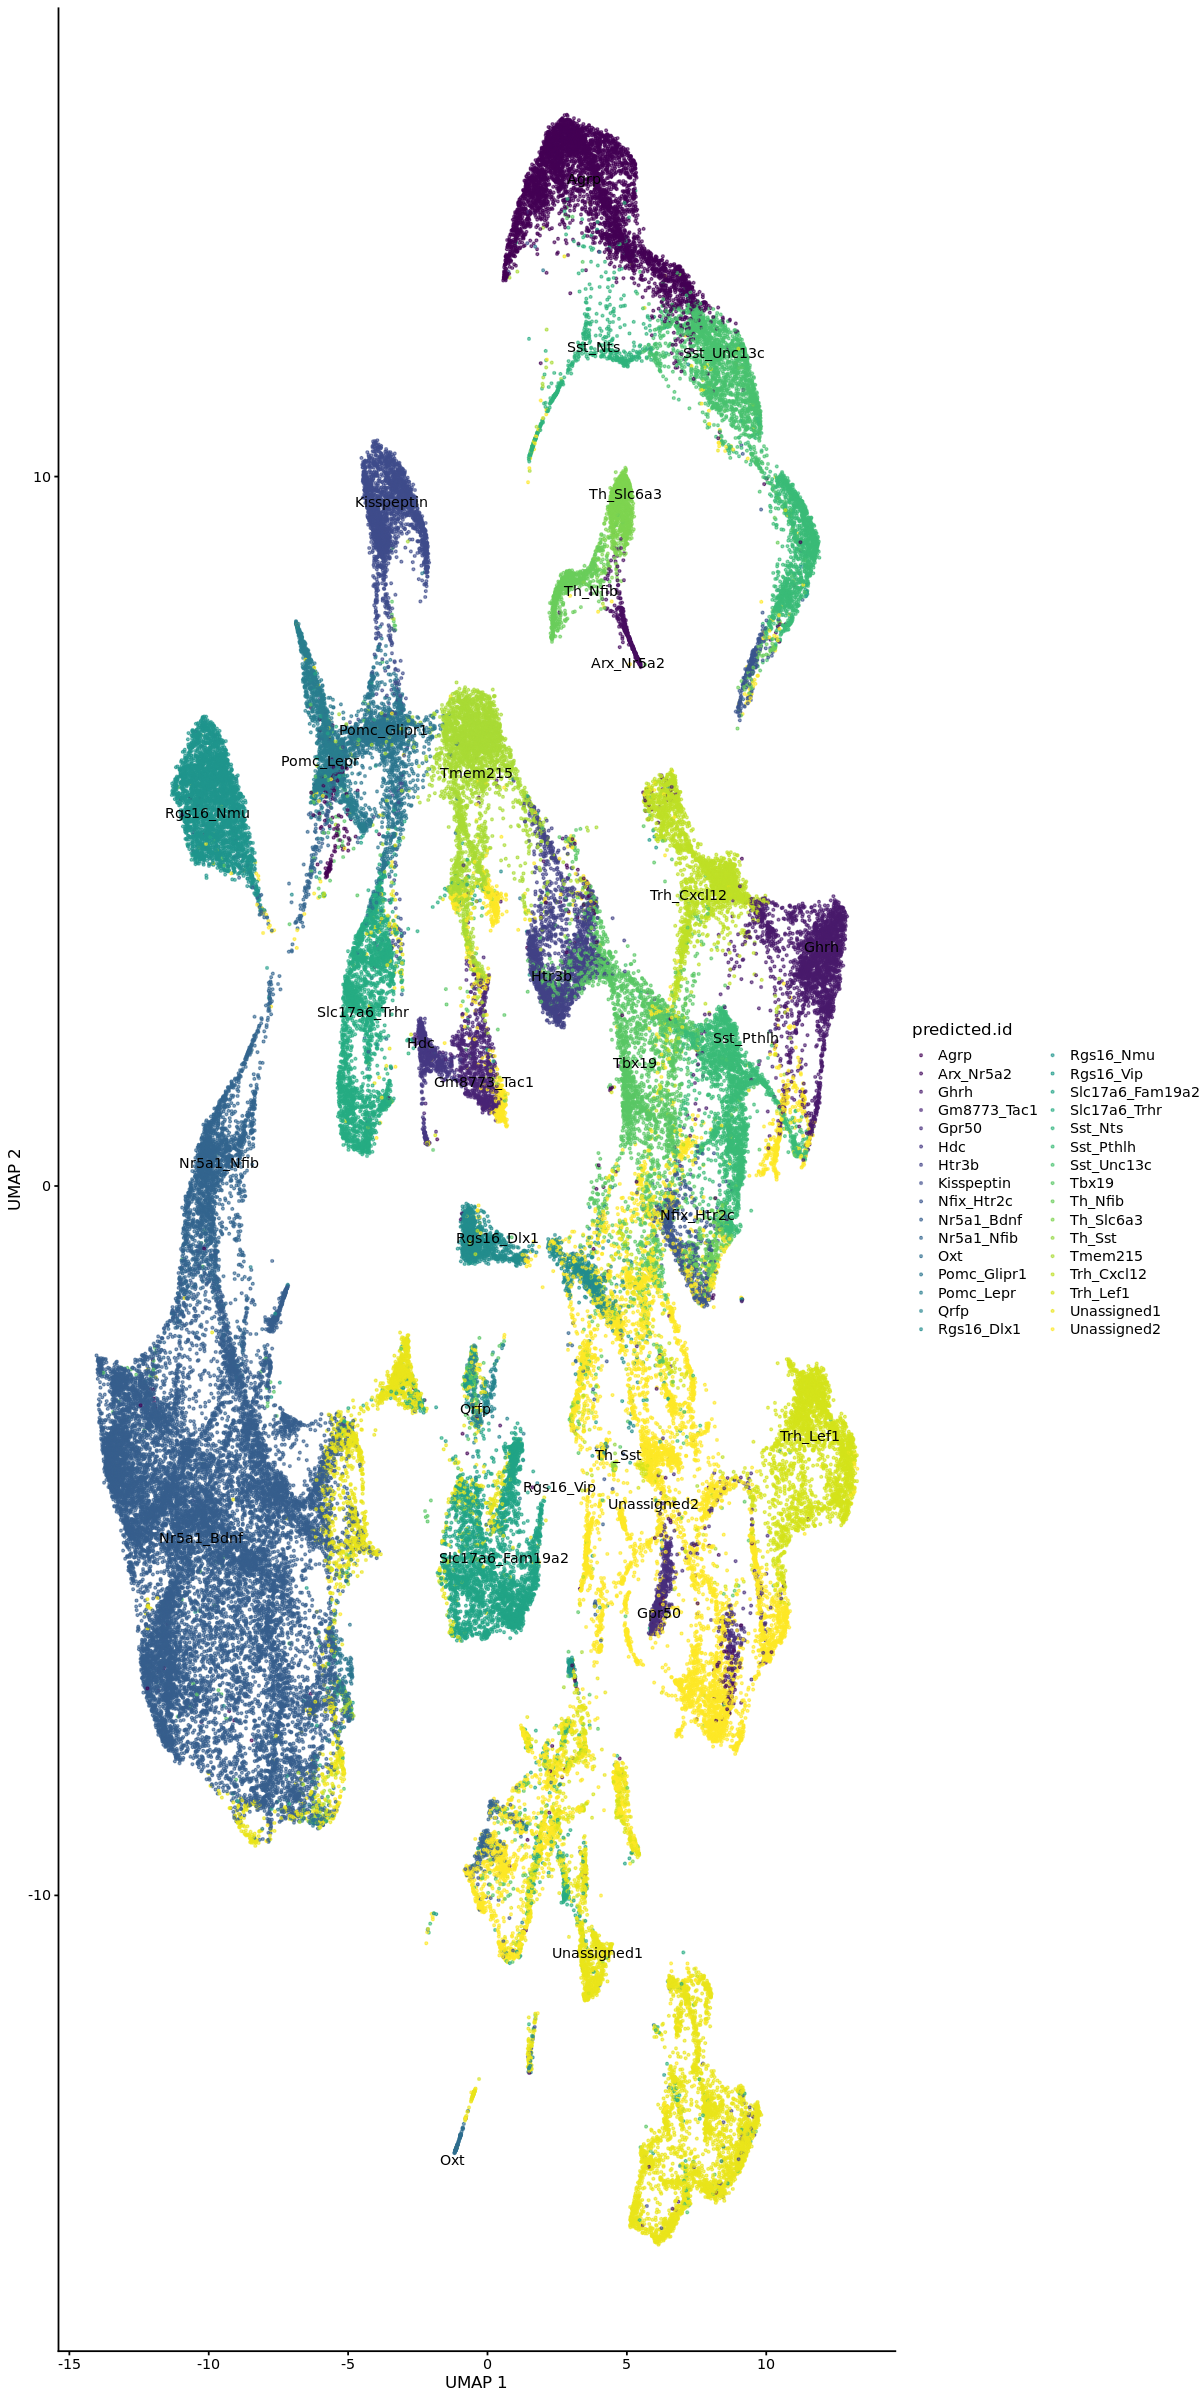

In [36]:
umap_pl

In [37]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

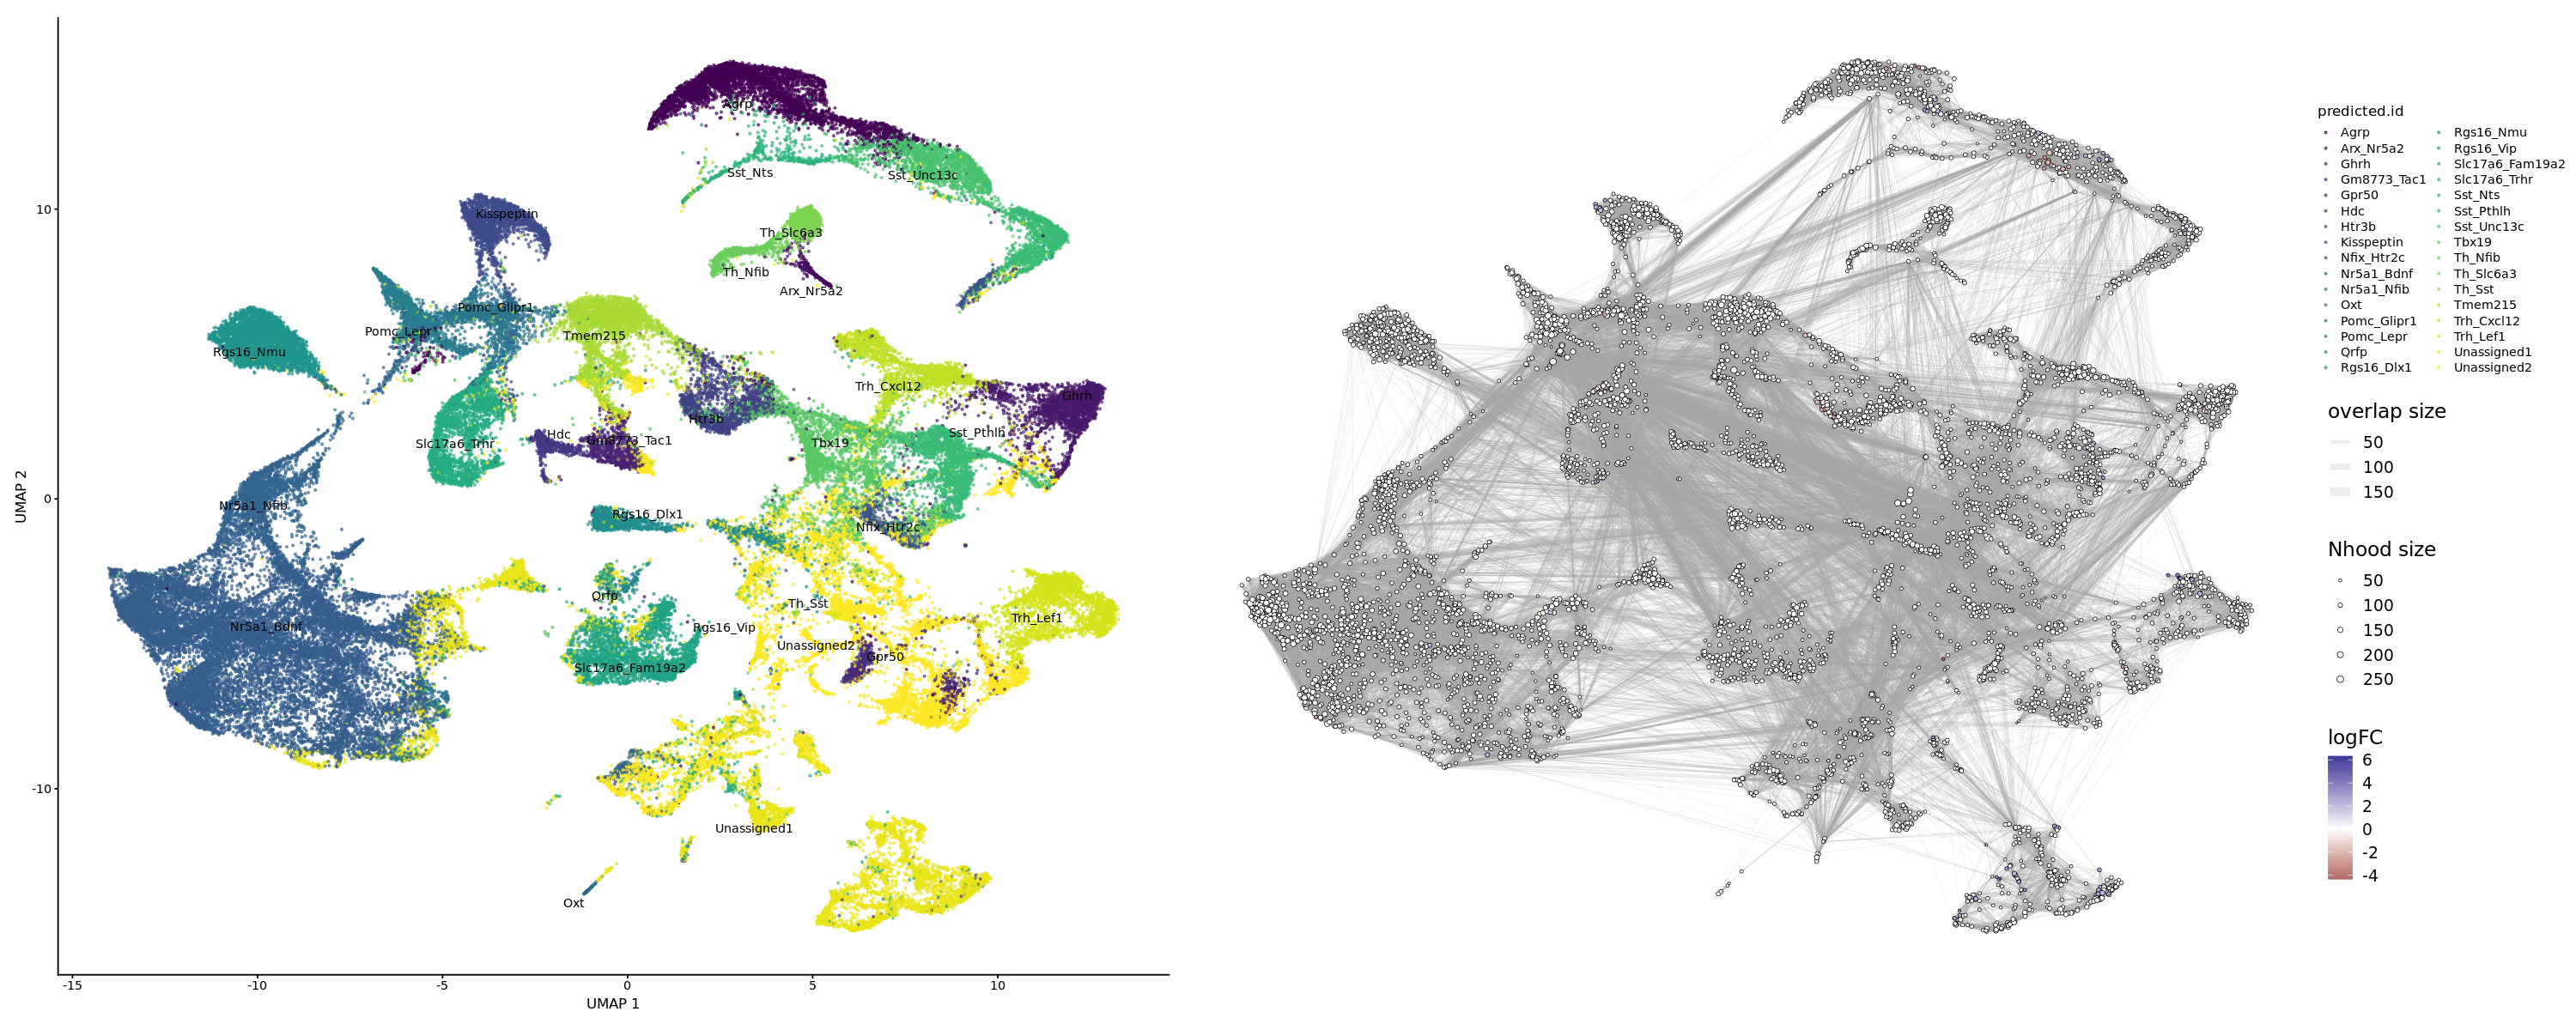

In [38]:
options(repr.plot.width=25, repr.plot.height=10)
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [39]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "predicted.id")
head(da_results)

Converting predicted.id to factor...



logFC       logCPM   F           PValue     FDR       Nhood SpatialFDR predicted.id predicted.id_fraction
1 -0.01809903 8.044026 0.001220262 0.97224760 0.9957352 1     0.9945884  Tbx19        0.7011494            
2 -0.42746087 8.065794 0.186545322 0.66948800 0.9027586 2     0.9067563  Unassigned1  0.8988764            
3 -0.71691091 8.366017 2.457563083 0.12212307 0.5230172 3     0.5357539  Rgs16_Dlx1   0.8455285            
4  0.38797178 8.077839 0.399542192 0.52968310 0.8500279 4     0.8578893  Nr5a1_Nfib   0.5393258            
5  0.13679337 8.058968 0.040229906 0.84170702 0.9663164 5     0.9669457  Sst_Pthlh    0.9885057            
6 -1.15795155 7.994486 3.782707671 0.05638922 0.3817173 6     0.3971231  Rgs16_Nmu    1.0000000

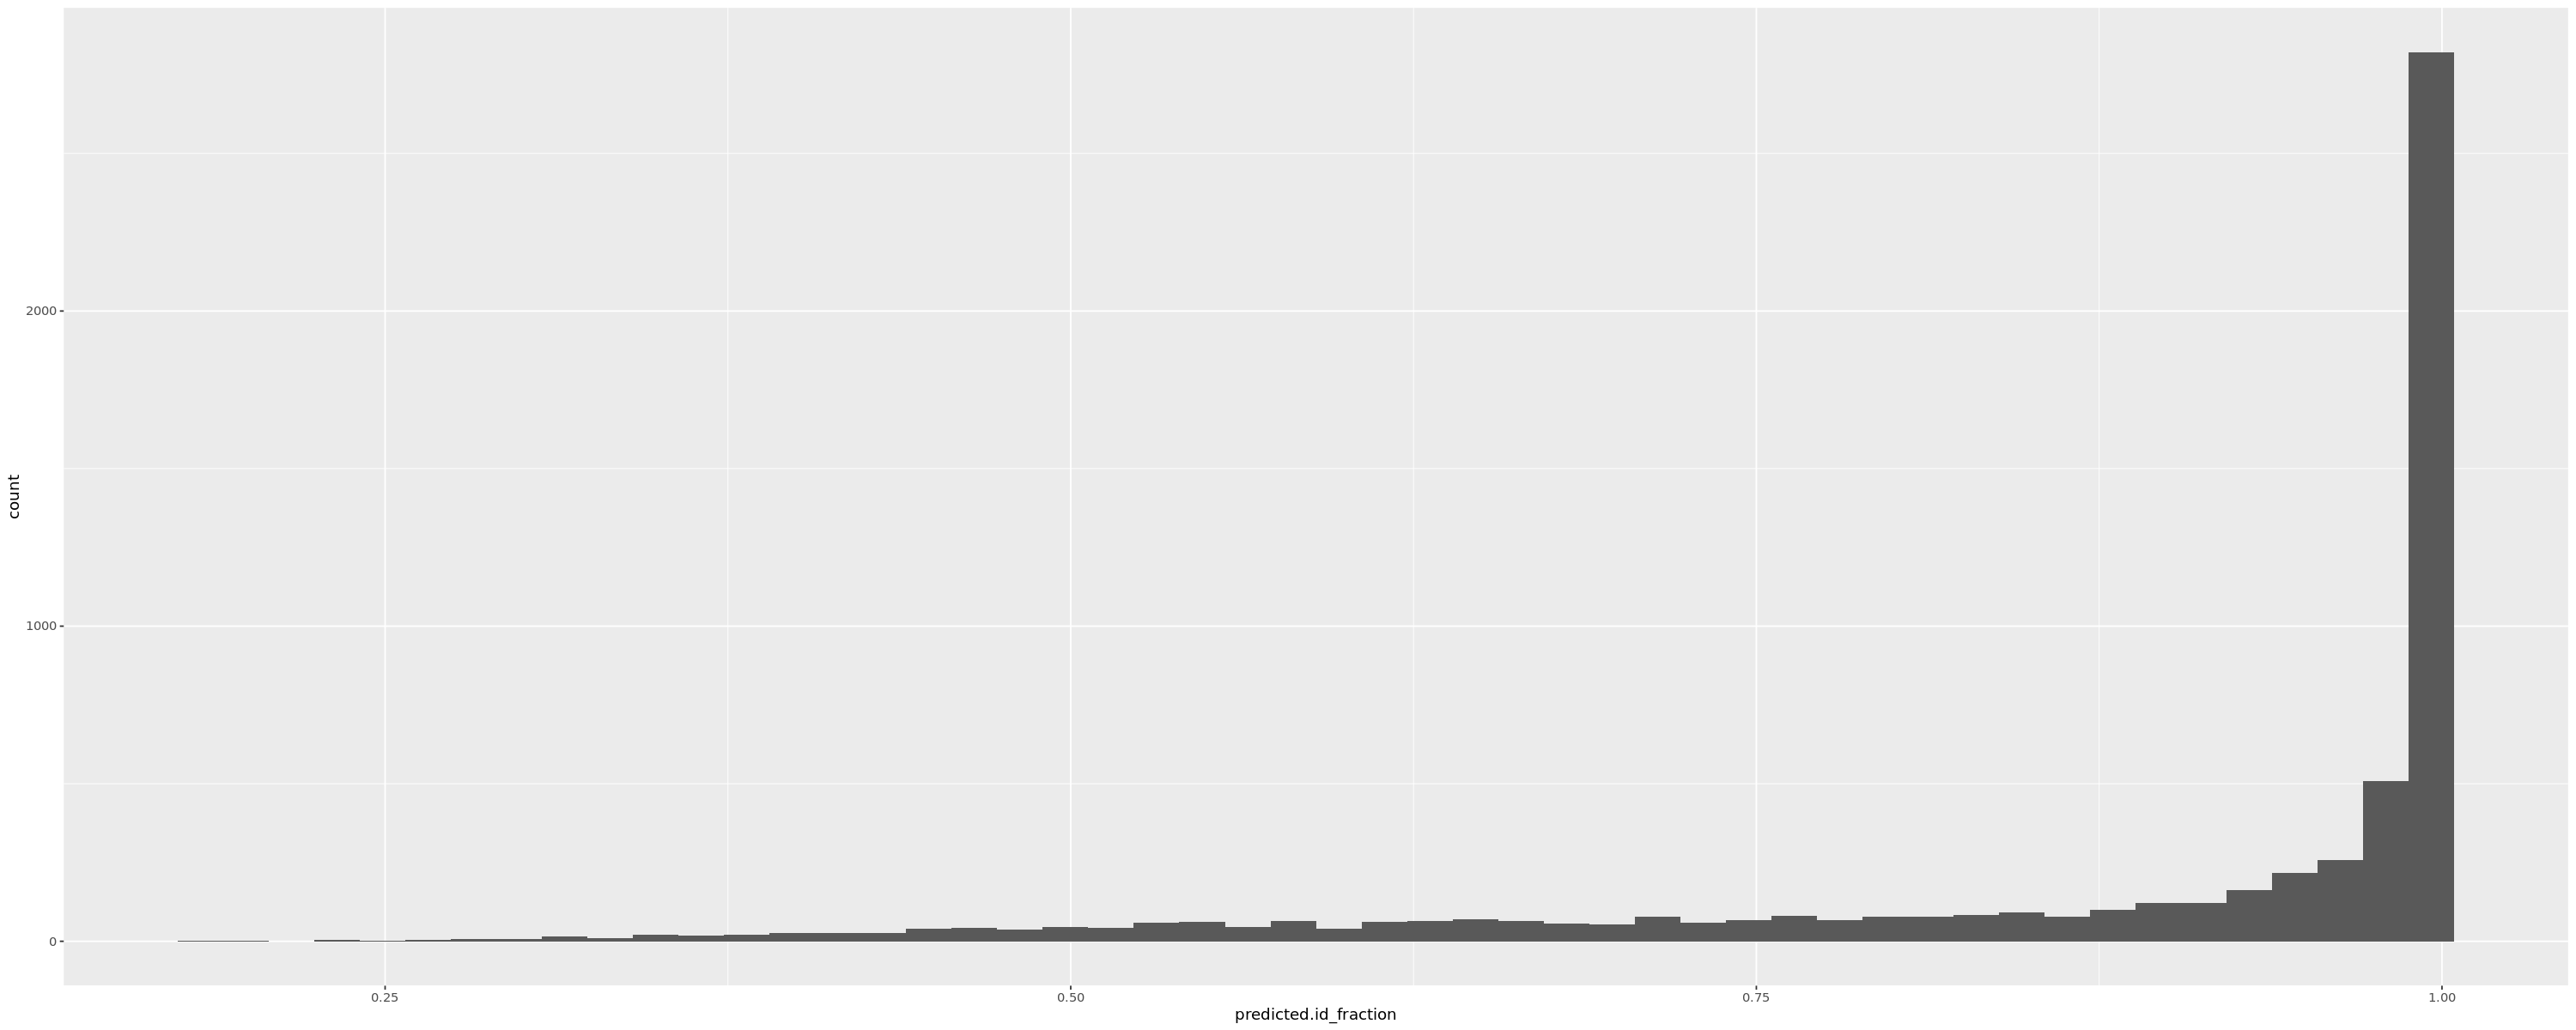

In [40]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(predicted.id_fraction)) + geom_histogram(bins=50)

In [41]:
da_results$predicted.id <- ifelse(da_results$predicted.id_fraction < 0.3, "Mixed", da_results$predicted.id)

Converting group.by to factor...



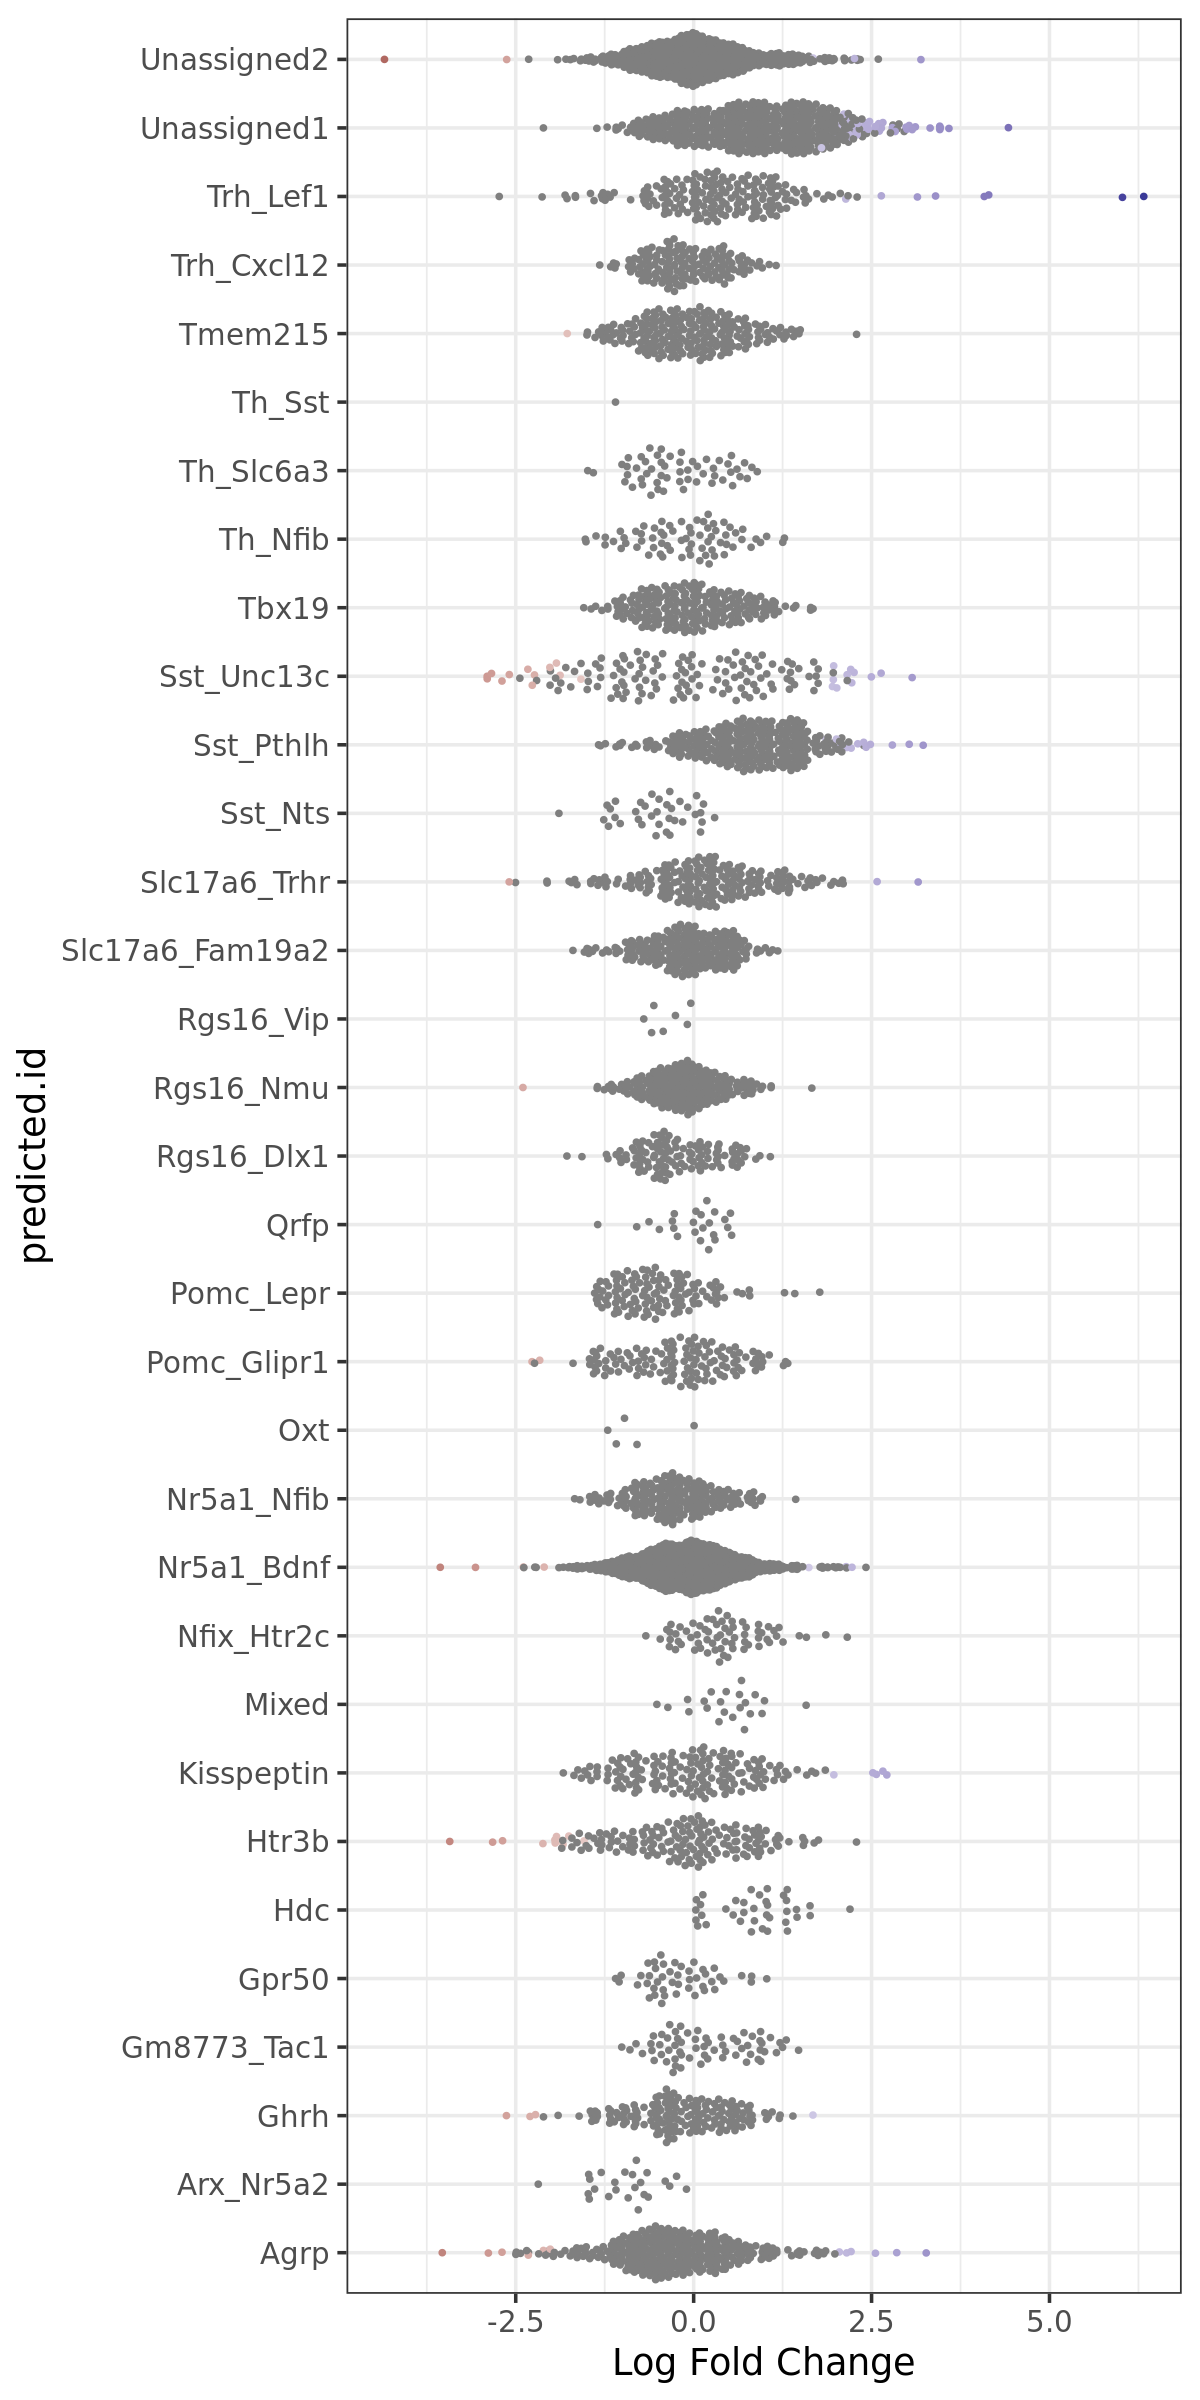

In [42]:
options(repr.plot.width=10, repr.plot.height=20)
plotDAbeeswarm(da_results, group.by = "predicted.id")

In [43]:
da_results <- groupNhoods(obob_milo, da_results, max.lfc.delta = 10, )
head(da_results)

Found 130 DA neighbourhoods at FDR 10%

nhoodAdjacency found - using for nhood grouping



logFC       logCPM   F           PValue     FDR       Nhood SpatialFDR predicted.id predicted.id_fraction NhoodGroup
1 -0.01809903 8.044026 0.001220262 0.97224760 0.9957352 1     0.9945884  Tbx19        0.7011494             1         
2 -0.42746087 8.065794 0.186545322 0.66948800 0.9027586 2     0.9067563  Unassigned1  0.8988764             2         
3 -0.71691091 8.366017 2.457563083 0.12212307 0.5230172 3     0.5357539  Rgs16_Dlx1   0.8455285             3         
4  0.38797178 8.077839 0.399542192 0.52968310 0.8500279 4     0.8578893  Nr5a1_Nfib   0.5393258             4         
5  0.13679337 8.058968 0.040229906 0.84170702 0.9663164 5     0.9669457  Sst_Pthlh    0.9885057             5         
6 -1.15795155 7.994486 3.782707671 0.05638922 0.3817173 6     0.3971231  Rgs16_Nmu    1.0000000             6

In [44]:
da_results %>% pull('NhoodGroup') %>% unique()

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "20" "21" "22" "23"

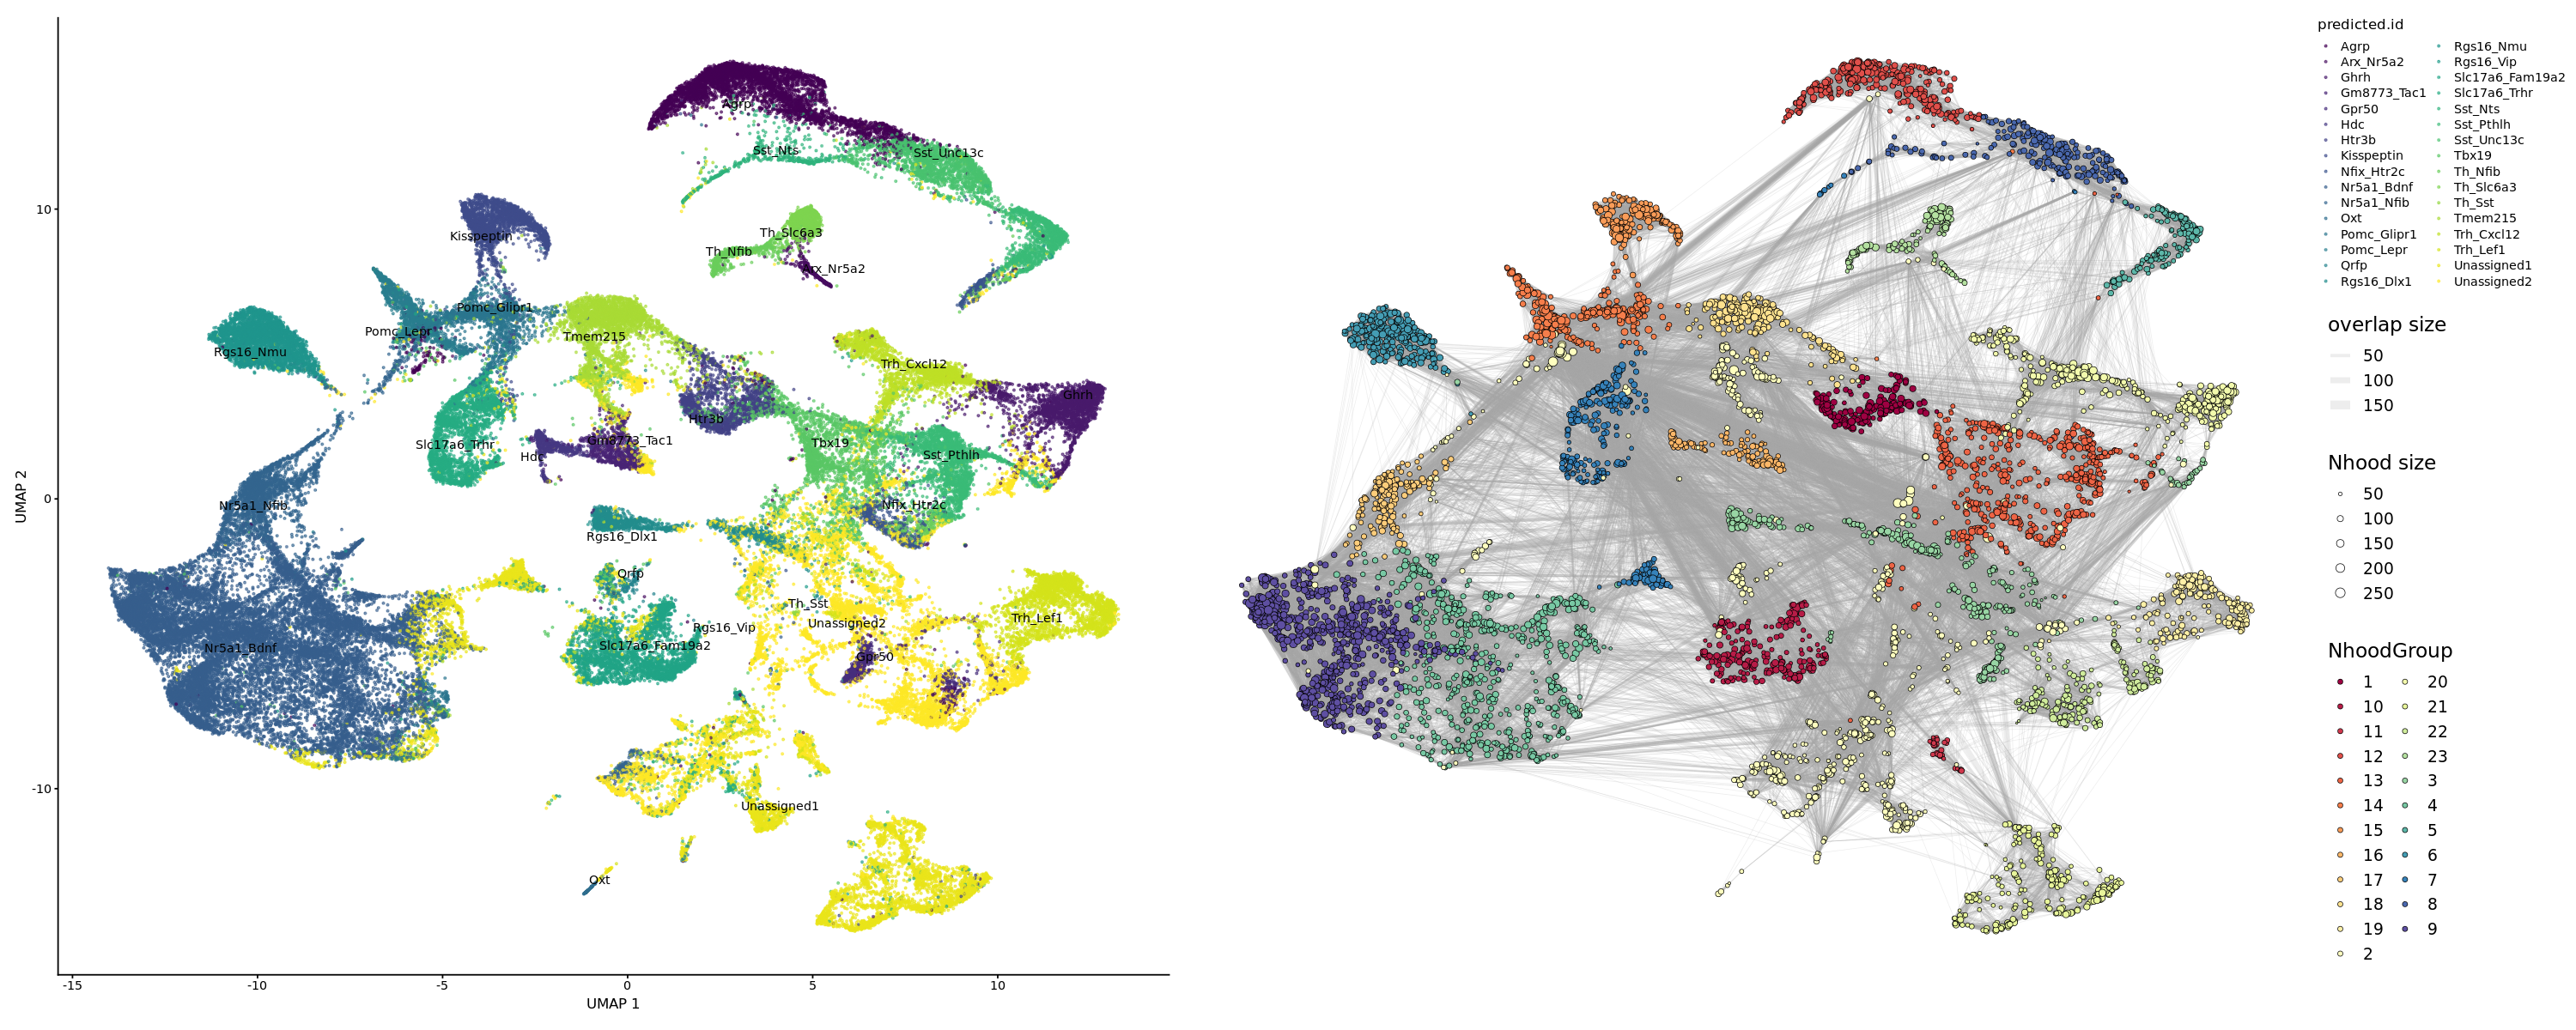

In [45]:
options(repr.plot.width=30, repr.plot.height=15)
nhood_groups_plot = plotNhoodGroups(obob_milo, da_results, layout="UMAP")
options(repr.plot.width=25, repr.plot.height=10)
umap_pl + nhood_groups_plot +
  plot_layout(guides="collect")

Converting group.by to factor...



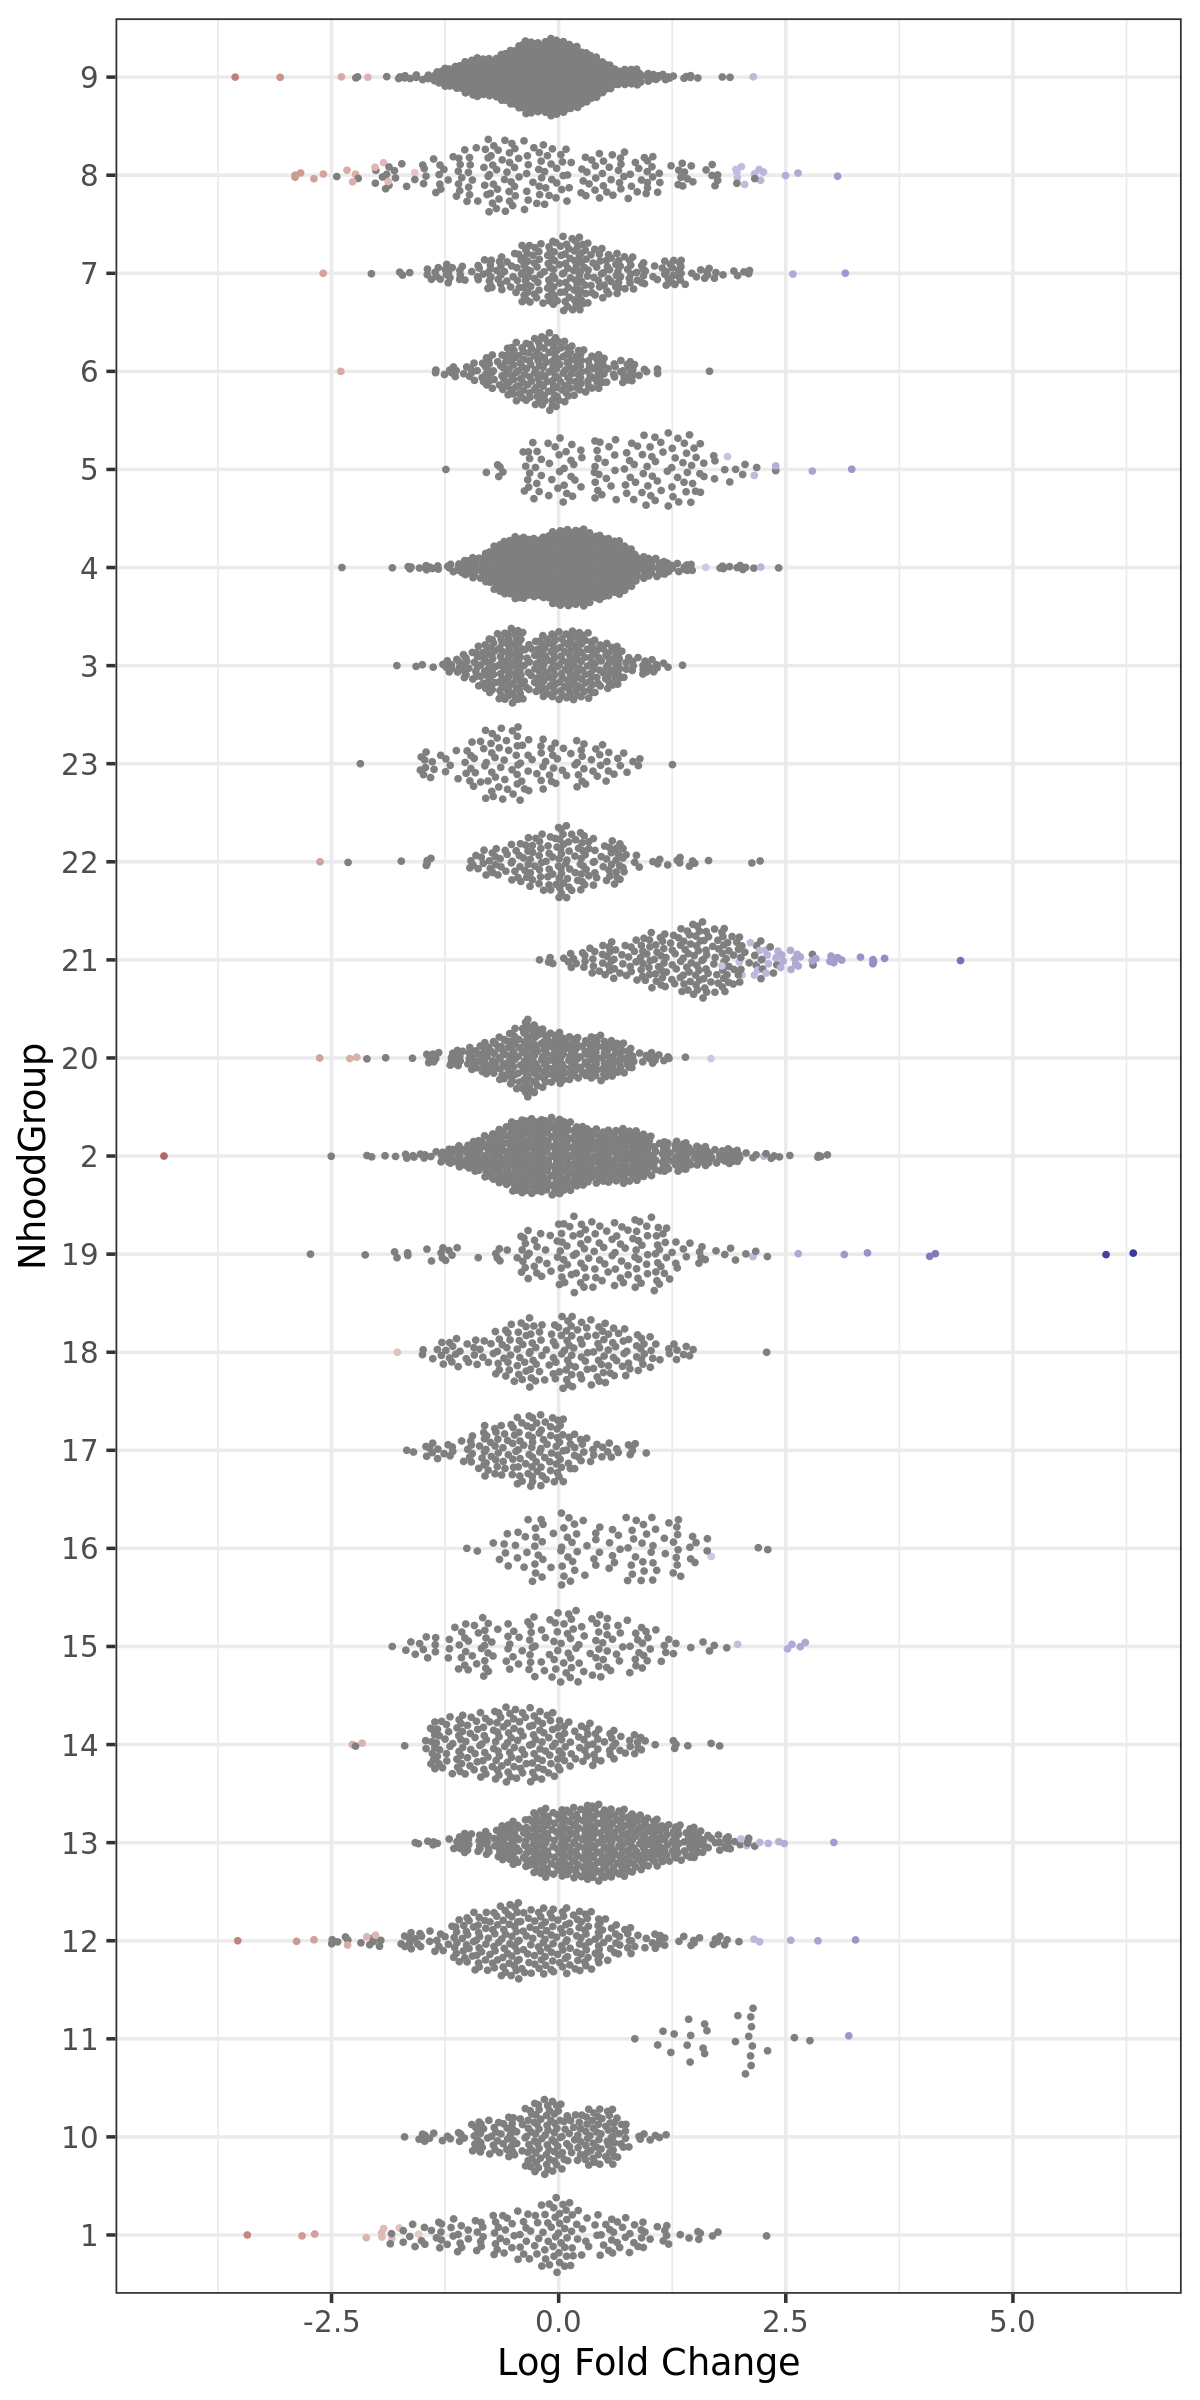

In [46]:
options(repr.plot.width=10, repr.plot.height=20)
plotDAbeeswarm(da_results, group.by = "NhoodGroup")

In [47]:
## Exclude zero counts genes
keep.rows <- rowSums(logcounts(obob_milo)) != 0
obob_milo <- obob_milo[keep.rows, ]

## Find HVGs
set.seed(101)
dec <- scran::modelGeneVar(obob_milo)
hvgs <- scran::getTopHVGs(dec, n=2000)
head(hvgs)

[1] "Erbb4"    "Hs3st4"   "Il1rapl2" "Cntn5"    "Nrxn3"    "Galntl6"

In [48]:
2

[1] 2

In [49]:
set.seed(42)
nhood_markers <- findNhoodGroupMarkers(obob_milo, da_results, subset.row = hvgs, 
                                       aggregate.samples = TRUE, sample_col = 'hash.mcl.ID')

head(nhood_markers)

GeneID        logFC_1     adj.P.Val_1  logFC_2     adj.P.Val_2 logFC_3      adj.P.Val_3 logFC_4     adj.P.Val_4 
1 0610040F04Rik  0.01264682 5.097126e-01  0.01924740 0.4169235   -0.031429919 0.11236780   0.10432290 3.195306e-09
2 1110019D14Rik  0.14207545 2.040121e-05  0.05965997 0.1524024   -0.062852750 0.08920628   0.15989382 1.929872e-06
3 1500009L16Rik -0.10843698 1.319474e-02 -0.08773558 0.0943643   -0.116472718 0.01170892  -0.01752435 7.254793e-01
4 1600020E01Rik  0.11374474 2.570882e-06 -0.02575952 0.4300123    0.008103083 0.78971250  -0.02614191 3.278466e-01
5 1700012D14Rik  0.03636912 2.345831e-01 -0.02979095 0.4447205    0.043333880 0.18475689  -0.12070716 3.805310e-05
6 1700025G04Rik -0.14022648 4.521093e-03  0.04551007 0.4889805   -0.118571560 0.02488650  -0.34738145 3.382727e-13
  logFC_5     ⋯ logFC_19    adj.P.Val_19 logFC_20     adj.P.Val_20 logFC_21    adj.P.Val_21 logFC_22    adj.P.Val_22
1  0.07095903 ⋯  0.01871688 3.328048e-01 -0.058632034 1.268883e-03  0.04939962 7.416814e-03  0.05891377 0.0012827351
2  0.02469887 ⋯  0.09135752 8.747680e-03 -0.178111461 9.699663e-08  0.13725396 5.621978e-05  0.01526580 0.6986813124
3  0.13933929 ⋯ -0.05133554 2.685394e-01  0.001973809 9.659916e-01 -0.10754916 1.634874e-02 -0.09050296 0.0460845572
4 -0.02466291 ⋯ -0.06143260 1.556726e-02  0.067818474 6.909735e-03 -0.06520209 1.009148e-02 -0.05017218 0.0518123174
5 -0.30580413 ⋯  0.06260455 3.975890e-02  0.044679436 1.444922e-01 -0.12915363 1.133013e-05  0.07607240 0.0120673036
6  0.10501034 ⋯  0.33527410 4.127466e-12 -0.496068478 2.959852e-27  0.13167107 9.393912e-03  0.18186322 0.0002649631
  logFC_23     adj.P.Val_23
1 -0.097374558 2.618505e-08
2 -0.082841038 1.487265e-02
3 -0.098199910 2.466992e-02
4  0.008823781 7.446401e-01
5  0.023455180 4.521821e-01
6  0.242735998 4.731341e-07

In [50]:
gr5_markers <- nhood_markers[c("logFC_5", "adj.P.Val_5")] 
colnames(gr5_markers) <- c("logFC", "adj.P.Val")

head(gr5_markers[order(gr5_markers$adj.P.Val), ])

logFC     adj.P.Val    
50   1.3136960  0.000000e+00
436  1.2125539  0.000000e+00
518  0.7924024 1.109815e-203
192  1.3272718 2.044661e-182
1762 1.6687179 7.093746e-169
1024 0.6965392 4.612842e-162

In [51]:
gr8_markers <- nhood_markers[c("GeneID", "logFC_8", "adj.P.Val_8")] 
colnames(gr8_markers) <- c("GeneID", "logFC", "adj.P.Val")

head(gr8_markers[order(gr8_markers$adj.P.Val), ])

GeneID   logFC     adj.P.Val    
1833 Tmem26   1.0707764 1.510172e-174
1389 Prkch    0.4621367 1.145499e-107
1443 Radx     0.4915779  6.739638e-77
870  Il1rapl2 2.8173991  3.827074e-49
1977 Zfp521   1.0778804  1.057704e-45
480  Efnb2    0.6680741  1.411738e-45